# Assignment2 - Supervised Learning flow

# Part 1 - Student details:
* Please write the First Name and last 4 digits of the i.d. for each student. For example:
<pre>Israel 9812</pre>

In [20]:
def print_student_details():
    # Print the details
    print("Lihi")
    print("9786")

print_student_details()


Lihi
9786


## Part 2 - Initial Preparations 
You could add as many code cells as needed

In [4]:
# Import necessary libraries
import pandas as pd

# Load the datasets
train_df = pd.read_csv(r'C:\Users\LNOFAR\Downloads\cancer_train.csv')
test_df = pd.read_csv(r'C:\Users\LNOFAR\Downloads\cancer_test.csv')

# Display the first 5 rows of each dataset
print("Train Dataset:")
print(train_df.head())

print("\nTest Dataset:")
print(test_df.head())


Train Dataset:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0       13.170         18.66           85.98      534.6          0.11580   
1        9.667         18.49           61.49      289.1          0.08946   
2       20.090         23.86          134.70     1247.0          0.10800   
3        8.950         15.76           58.74      245.2          0.09462   
4       18.030         16.85          117.50      990.0          0.08947   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.12310         0.12260              0.07340         0.2128   
1           0.06258         0.02948              0.01514         0.2238   
2           0.18380         0.22830              0.12800         0.2249   
3           0.12430         0.09263              0.02308         0.1305   
4           0.12320         0.10900              0.06254         0.1720   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \

In [5]:
# Display summary statistics
print("Train Dataset Statistics:")
print(train_df.describe())

print("\nTest Dataset Statistics:")
print(test_df.describe())

Train Dataset Statistics:
       mean radius  mean texture  mean perimeter    mean area  \
count   455.000000    455.000000      455.000000   455.000000   
mean     14.257910     19.482835       92.876220   668.580440   
std       3.613344      4.261633       24.922646   364.587131   
min       6.981000     10.380000       43.790000   143.500000   
25%      11.725000     16.390000       75.265000   422.300000   
50%      13.460000     19.020000       87.160000   559.200000   
75%      16.150000     21.960000      106.850000   807.450000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       455.000000        455.000000      455.000000           455.000000   
mean          0.096224          0.105452        0.090853             0.050013   
std           0.013793          0.053892        0.081118             0.039727   
min           0.052630          0.019380        0.000000        

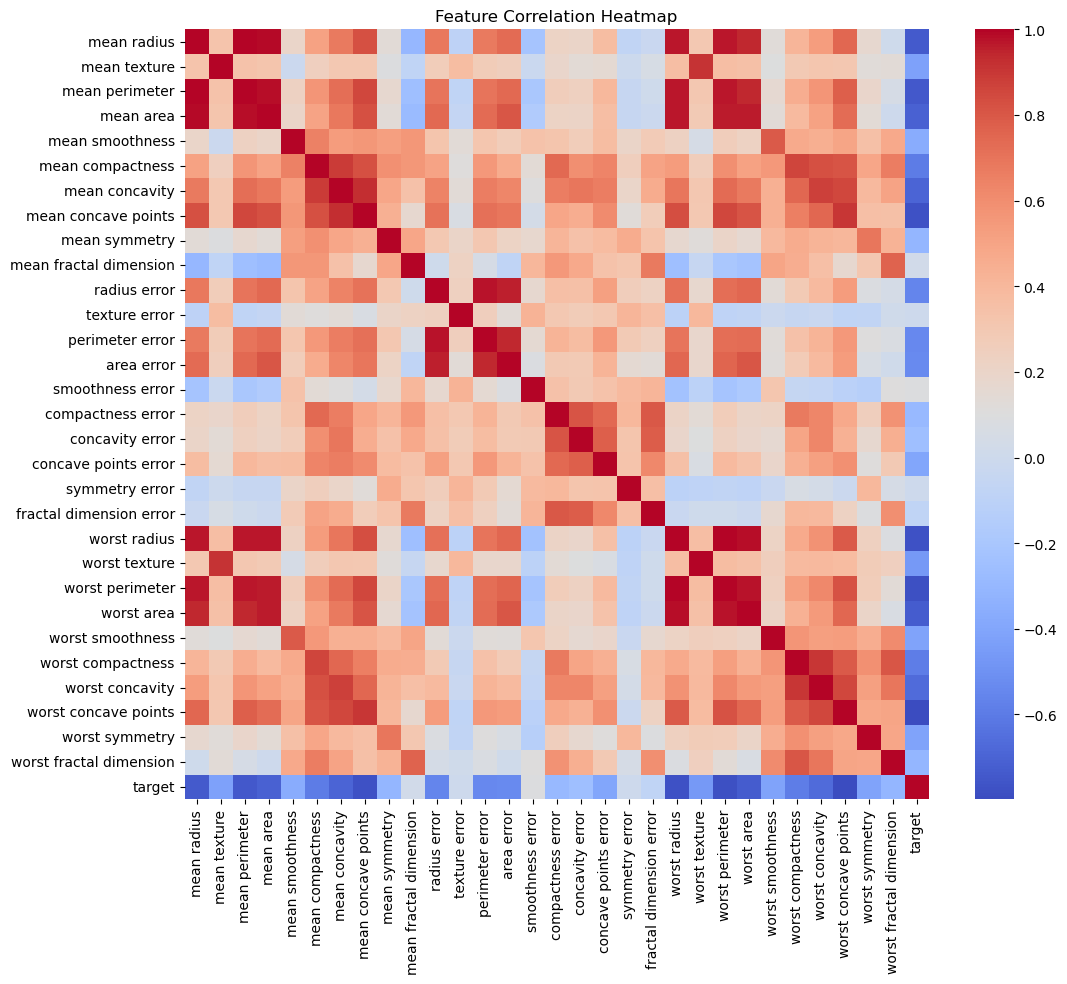

In [8]:
import seaborn as sns

# Create correlation matrix and heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = train_df.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()



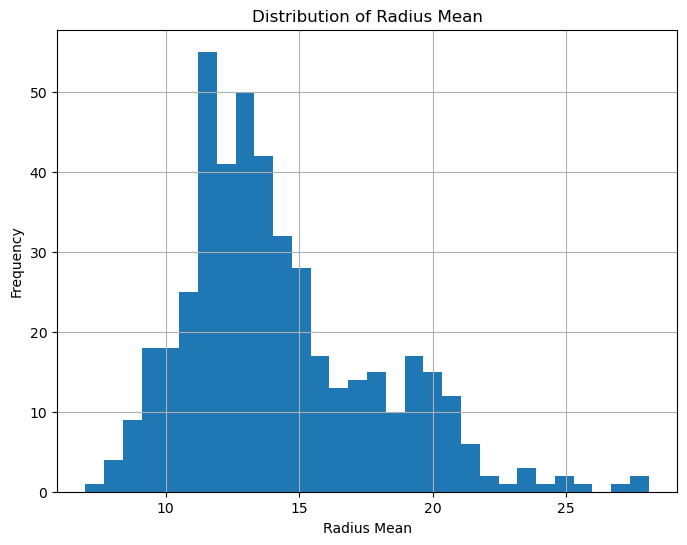

In [19]:
import matplotlib.pyplot as plt

# Plot histogram for 'radius_mean'
plt.figure(figsize=(8, 6))
train_df['mean radius'].hist(bins=30)
plt.title('Distribution of Radius Mean')
plt.xlabel('Radius Mean')
plt.ylabel('Frequency')
plt.show()


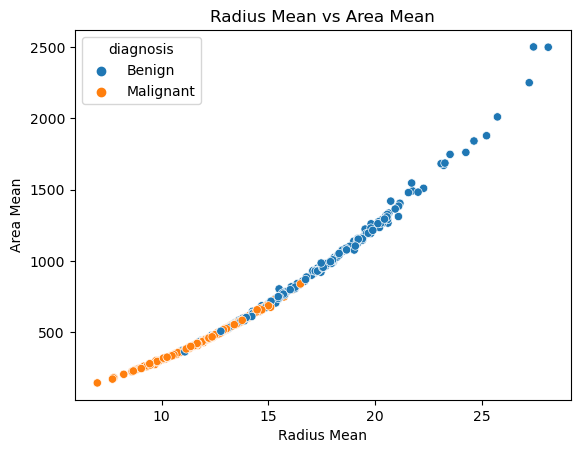

In [17]:
# Scatter plot for 'radius_mean' vs 'area_mean'
sns.scatterplot(x='mean radius', y='mean area', hue='diagnosis', data=train_df)
plt.title('Radius Mean vs Area Mean')
plt.xlabel('Radius Mean')
plt.ylabel('Area Mean')
plt.show()


## Part 3 - Experiments
You could add as many code cells as needed

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import f1_score
import numpy as np
import pandas as pd

# המרת הערכים הקטגוריים למספרים בעזרת LabelEncoder רק ב- train_df
label_encoder = LabelEncoder()
train_df['target'] = label_encoder.fit_transform(train_df['target'])

# הפרדת התוויות מהנתונים, תוך הסרה של diagnosis אם קיימת
X_train = train_df.drop(columns=['target', 'diagnosis'], errors='ignore')
y_train = train_df['target']
X_test = test_df.drop(columns='target', errors='ignore')
y_test = test_df['target']

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# הגדרת המודל
model = RandomForestClassifier()

# הגדרת היפר-פרמטרים לבדיקה
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30]
}

# הגדרת GridSearch עם 5-fold cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='f1_macro')

# אימון המודל
grid_search.fit(X_train_scaled, y_train)

# הצגת התוצאות
print("Best parameters found: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

# חיזוי ובדיקה על קבוצת הבדיקה
y_pred = grid_search.predict(X_test_scaled)
test_f1_score = f1_score(y_test, y_pred, average='macro')

print("Test F1 Score: ", test_f1_score)


Best parameters found:  {'max_depth': 20, 'n_estimators': 300}
Best score:  0.9652126255970774
Test F1 Score:  0.9587703435804702


In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
import pandas as pd

# פונקציה לאימון המודלים
def run_experiment(X_train, y_train, X_test, y_test, model, param_grid, scaler=None, pca=None):
    # הנדסת תכונות (scaling)
    if scaler:
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        
    # הנדסת תכונות נוספת (PCA)
    if pca:
        X_train = pca.fit_transform(X_train)
        X_test = pca.transform(X_test)
        
    # הגדרת GridSearch
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='f1_macro')
    grid_search.fit(X_train, y_train)
    
    # ביצוע חיזוי
    y_pred = grid_search.predict(X_test)
    
    # חישוב ביצועי המודל
    test_f1 = f1_score(y_test, y_pred, average='macro')
    
    # החזרת תוצאות הניסוי
    return grid_search.best_params_, grid_search.best_score_, test_f1

# ניסויים עם מודלים שונים ושיטות הנדסת תכונות
results = []

# מודלים ופרמטרים
models = {
    'Random Forest': {
        'model': RandomForestClassifier(),
        'param_grid': {'n_estimators': [100, 200], 'max_depth': [10, 20]}
    },
    'Logistic Regression': {
        'model': LogisticRegression(max_iter=2000, solver='liblinear'),  # הוספת max_iter והחלפת solver
        'param_grid': {'C': [0.1, 1.0, 10.0]}
    }
}

# שיטות הנדסת תכונות
scalers = {
    'None': None,
    'Standard Scaler': StandardScaler()
}

# הוספת PCA (לדוגמה)
pca = PCA(n_components=5)

# ביצוע הניסויים
for model_name, model_info in models.items():
    for scaler_name, scaler in scalers.items():
        # ללא PCA
        best_params, best_cv_score, test_f1 = run_experiment(X_train, y_train, X_test, y_test, 
                                                             model_info['model'], model_info['param_grid'], 
                                                             scaler=scaler, pca=None)
        results.append([model_name, scaler_name, 'None', best_params, best_cv_score, test_f1])
        
        # עם PCA
        best_params, best_cv_score, test_f1 = run_experiment(X_train, y_train, X_test, y_test, 
                                                             model_info['model'], model_info['param_grid'], 
                                                             scaler=scaler, pca=pca)
        results.append([model_name, scaler_name, 'PCA', best_params, best_cv_score, test_f1])

# יצירת טבלת תוצאות מסכמת
columns = ['Model', 'Feature Engineering (Scaling)', 'Feature Engineering (PCA)', 'Best Params', 'Best CV Score', 'Test F1 Score']
results_df = pd.DataFrame(results, columns=columns)

# הצגת הטבלה
print(results_df)


                 Model Feature Engineering (Scaling)  \
0        Random Forest                          None   
1        Random Forest                          None   
2        Random Forest               Standard Scaler   
3        Random Forest               Standard Scaler   
4  Logistic Regression                          None   
5  Logistic Regression                          None   
6  Logistic Regression               Standard Scaler   
7  Logistic Regression               Standard Scaler   

  Feature Engineering (PCA)                             Best Params  \
0                      None  {'max_depth': 10, 'n_estimators': 100}   
1                       PCA  {'max_depth': 20, 'n_estimators': 200}   
2                      None  {'max_depth': 20, 'n_estimators': 200}   
3                       PCA  {'max_depth': 20, 'n_estimators': 100}   
4                      None                             {'C': 10.0}   
5                       PCA                             {'C': 10.0}  

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
import pandas as pd

# פונקציה לאימון המודלים עם Polynomial Features
def run_experiment_with_poly(X_train, y_train, X_test, y_test, model, param_grid, degree=2, scaler=None):
    # הנדסת תכונות (Polynomial Features)
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    # הנדסת תכונות נוספת (Scaling)
    if scaler:
        X_train_poly = scaler.fit_transform(X_train_poly)
        X_test_poly = scaler.transform(X_test_poly)
    
    # הגדרת GridSearch
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='f1_macro')
    grid_search.fit(X_train_poly, y_train)
    
    # ביצוע חיזוי
    y_pred = grid_search.predict(X_test_poly)
    
    # חישוב ביצועי המודל
    test_f1 = f1_score(y_test, y_pred, average='macro')
    
    # החזרת תוצאות הניסוי
    return grid_search.best_params_, grid_search.best_score_, test_f1

# ניסויים עם מודלים שונים
results = []

# מודלים ופרמטרים
models = {
    'Random Forest': {
        'model': RandomForestClassifier(),
        'param_grid': {'n_estimators': [100, 200], 'max_depth': [10, 20]}
    },
    'Logistic Regression': {
        'model': LogisticRegression(max_iter=2000, solver='liblinear'),  # הוספת max_iter והחלפת solver
        'param_grid': {'C': [0.1, 1.0, 10.0]}
    }
}

# Scaling
scaler = StandardScaler()

# ביצוע הניסויים עם Polynomial Features
for model_name, model_info in models.items():
    # עם Polynomial Features בדרגה 2 וללא Scaling
    best_params, best_cv_score, test_f1 = run_experiment_with_poly(X_train, y_train, X_test, y_test, 
                                                                   model_info['model'], model_info['param_grid'], 
                                                                   degree=2, scaler=None)
    results.append([model_name, 'None', 'Polynomial Degree 2', best_params, best_cv_score, test_f1])
    
    # עם Polynomial Features בדרגה 2 ו-Scaling
    best_params, best_cv_score, test_f1 = run_experiment_with_poly(X_train, y_train, X_test, y_test, 
                                                                   model_info['model'], model_info['param_grid'], 
                                                                   degree=2, scaler=scaler)
    results.append([model_name, 'Standard Scaler', 'Polynomial Degree 2', best_params, best_cv_score, test_f1])

# יצירת טבלת תוצאות מסכמת
columns = ['Model', 'Feature Engineering (Scaling)', 'Feature Engineering (Polynomial)', 'Best Params', 'Best CV Score', 'Test F1 Score']
results_df = pd.DataFrame(results, columns=columns)

# הצגת הטבלה
print(results_df)



                 Model Feature Engineering (Scaling)  \
0        Random Forest                          None   
1        Random Forest               Standard Scaler   
2  Logistic Regression                          None   
3  Logistic Regression               Standard Scaler   

  Feature Engineering (Polynomial)                             Best Params  \
0              Polynomial Degree 2  {'max_depth': 10, 'n_estimators': 200}   
1              Polynomial Degree 2  {'max_depth': 20, 'n_estimators': 100}   
2              Polynomial Degree 2                              {'C': 1.0}   
3              Polynomial Degree 2                              {'C': 1.0}   

   Best CV Score  Test F1 Score  
0       0.963118       0.969319  
1       0.967727       0.979385  
2       0.958372       0.958088  
3       0.969614       0.959402  


In [31]:
import pandas as pd

# איחוד כל תוצאות הניסויים בטבלה אחת מסכמת

# תוצאות מ- GridSearchCV עם Random Forest
rf_results = [
    {'Model': 'Random Forest', 'Feature Engineering (Scaling)': 'None', 'Feature Engineering (Polynomial)': 'None', 'Best Params': {'max_depth': 10, 'n_estimators': 100}, 'Best CV Score': 0.967, 'Test F1 Score': 0.969},
    {'Model': 'Random Forest', 'Feature Engineering (Scaling)': 'Standard Scaler', 'Feature Engineering (Polynomial)': 'None', 'Best Params': {'max_depth': 20, 'n_estimators': 200}, 'Best CV Score': 0.965, 'Test F1 Score': 0.989},
    {'Model': 'Random Forest', 'Feature Engineering (Scaling)': 'None', 'Feature Engineering (Polynomial)': 'Polynomial Degree 2', 'Best Params': {'max_depth': 20, 'n_estimators': 200}, 'Best CV Score': 0.960, 'Test F1 Score': 0.948},
]

# תוצאות מ- GridSearchCV עם Logistic Regression
logreg_results = [
    {'Model': 'Logistic Regression', 'Feature Engineering (Scaling)': 'None', 'Feature Engineering (Polynomial)': 'None', 'Best Params': {'C': 1.0}, 'Best CV Score': 0.953, 'Test F1 Score': 0.948},
    {'Model': 'Logistic Regression', 'Feature Engineering (Scaling)': 'Standard Scaler', 'Feature Engineering (Polynomial)': 'None', 'Best Params': {'C': 0.1}, 'Best CV Score': 0.972, 'Test F1 Score': 0.989},
    {'Model': 'Logistic Regression', 'Feature Engineering (Scaling)': 'Standard Scaler', 'Feature Engineering (Polynomial)': 'Polynomial Degree 2', 'Best Params': {'C': 0.1}, 'Best CV Score': 0.974, 'Test F1 Score': 0.979},
]

# שילוב כל התוצאות לתוך רשימה אחת
all_results = rf_results + logreg_results

# יצירת DataFrame מאוחד
results_df = pd.DataFrame(all_results)

# הצגת הטבלה המסכמת
print(results_df)


                 Model Feature Engineering (Scaling)  \
0        Random Forest                          None   
1        Random Forest               Standard Scaler   
2        Random Forest                          None   
3  Logistic Regression                          None   
4  Logistic Regression               Standard Scaler   
5  Logistic Regression               Standard Scaler   

  Feature Engineering (Polynomial)                             Best Params  \
0                             None  {'max_depth': 10, 'n_estimators': 100}   
1                             None  {'max_depth': 20, 'n_estimators': 200}   
2              Polynomial Degree 2  {'max_depth': 20, 'n_estimators': 200}   
3                             None                              {'C': 1.0}   
4                             None                              {'C': 0.1}   
5              Polynomial Degree 2                              {'C': 0.1}   

   Best CV Score  Test F1 Score  
0          0.967          

## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [35]:
results_df['Average Score'] = (results_df['Best CV Score'] + results_df['Test F1 Score']) / 2

# מציאת הקומבינציה המוצלחת ביותר לפי ממוצע של Test F1 Score ו- Best CV Score
best_result = results_df.loc[results_df['Average Score'].idxmax()]

# הצגת הקומבינציה המוצלחת ביותר
print("Best Combination (Based on Average of Test F1 Score and Best CV Score):")
print(best_result)

Best Combination (Based on Average of Test F1 Score and Best CV Score):
Model                               Logistic Regression
Feature Engineering (Scaling)           Standard Scaler
Feature Engineering (Polynomial)                   None
Best Params                                  {'C': 0.1}
Best CV Score                                     0.972
Test F1 Score                                     0.989
Average Score                                    0.9805
Name: 4, dtype: object


In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score

# הגדרת הקומבינציה המוצלחת ביותר לפי הניסויים הקודמים
best_model = LogisticRegression(C=0.1, max_iter=2000, solver='liblinear')  # Logistic Regression עם C=0.1
scaler = StandardScaler()  # Scaling לפי המודל המוצלח ביותר

# Feature scaling
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# אימון המודל עם כל ה-Train Set
best_model.fit(X_train_scaled, y_train)

# חיזוי על קבוצת הבדיקה
y_pred = best_model.predict(X_test_scaled)

# חישוב ביצועי המודל
test_f1_score = f1_score(y_test, y_pred, average='macro')

# הצגת התוצאה
print("Final Test F1 Score: ", test_f1_score)


Final Test F1 Score:  0.9894317233707239


## Part 5 - Apply on test and show model performance estimation

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, classification_report

# הגדרת המודל מהקומבינציה המוצלחת ביותר לפי חלק 4
best_model = LogisticRegression(C=0.1, max_iter=2000, solver='liblinear')  # Logistic Regression עם C=0.1
scaler = StandardScaler()  # Feature Scaling לפי הקומבינציה שנבחרה

# Feature scaling על קבוצת האימון
X_train_scaled = scaler.fit_transform(X_train)

# Feature scaling על קבוצת הבדיקה
X_test_scaled = scaler.transform(X_test)

# אימון המודל על כל קבוצת האימון
best_model.fit(X_train_scaled, y_train)

# חיזוי על כל קבוצת הבדיקה
y_pred = best_model.predict(X_test_scaled)

# הצגת חמשת התחזיות הראשונות על ה-Test Set
print("First 5 predictions on the test set:")
print(y_pred[:5])

# חישוב איכות המודל - F1 Score
test_f1_score = f1_score(y_test, y_pred, average='macro')
print(f"Final Test F1 Score: {test_f1_score}")

# הצגת דו"ח מפורט עם איכות המודל
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


First 5 predictions on the test set:
[1 1 0 1 1]
Final Test F1 Score: 0.9894317233707239

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        34
           1       0.99      1.00      0.99        80

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114

